In [11]:
# 1. Authenticate
from google.colab import auth
auth.authenticate_user()
print('Authenticated Successfully')

# 2. Import the GBQ Library
from google.cloud import bigquery
import pandas as pd

# 3. Initialize the client with your Project ID
project_id = 'pp26-488519'
client = bigquery.Client(project=project_id)

# 4. Pull the data from SQL
sql = """
SELECT * FROM `pp26-488519.gld_price.v_gold_performance_php`
ORDER BY Market_Date DESC
"""

df = client.query(sql).to_dataframe()
df.head()

Authenticated Successfully


,Market_Date,Gold_USD,Silver_USD,Sp500_index,Oil_USD,EUR_USD_Rate,Gold_PHP,Silver_PHP,Gold_Silver_Ratio,Daily_Return_PCT,Gold_30day_MovAVG_PHP,Market_regime
0,2025-08-14,307.250000,34.500000,6468.540039,73.739998,1.171289,17722.18,1989.96,8.91,-0.63,17792.93,Risk-On Market
1,2025-08-13,309.209992,35.000000,6466.580078,72.459999,1.167706,17835.23,2018.80,8.83,0.30,17796.78,Neutral
2,2025-08-12,308.269989,34.410000,6445.759766,72.949997,1.161845,17781.01,1984.77,8.96,-0.09,17793.59,Risk-On Market
3,2025-08-11,308.549988,34.180000,6373.450195,73.800003,1.164795,17797.16,1971.50,9.03,-1.44,17786.97,Neutral
4,2025-08-08,313.049988,34.880001,6389.450195,73.300003,1.167665,18056.72,2011.88,8.98,-0.02,17772.88,Risk-On Market


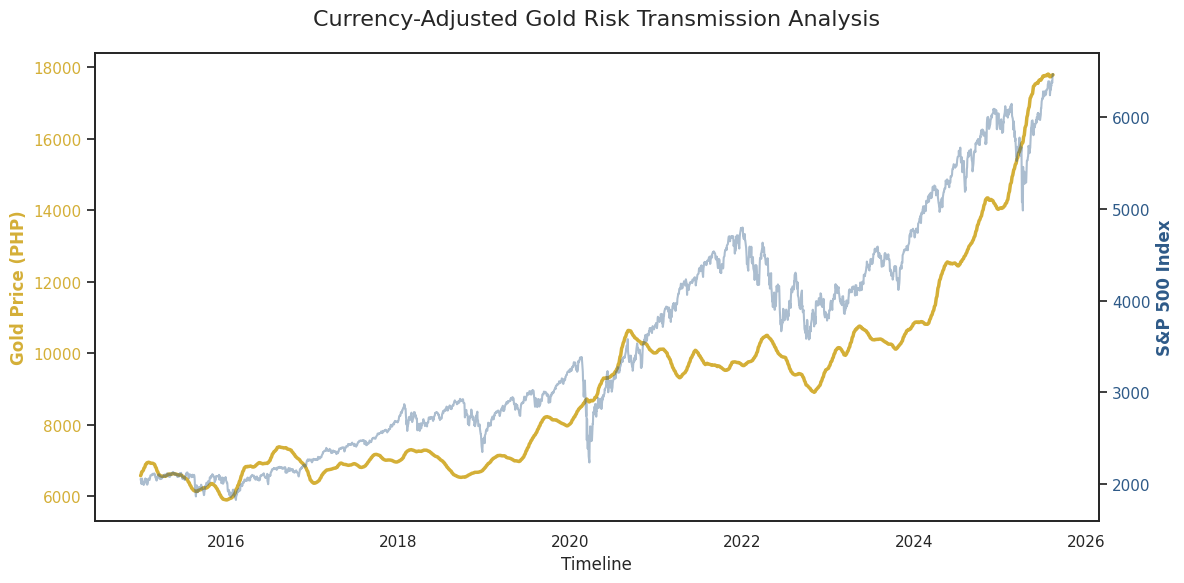

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set Style
sns.set_theme(style="white")
fig, ax1 = plt.subplots(figsize=(12, 6))

# 2. Plot Gold Price in PHP (The Primary Y-Axis)
color_gold = '#D4AF37' # Metallic Gold color
ax1.set_xlabel('Timeline')
ax1.set_ylabel('Gold Price (PHP)', color=color_gold, fontsize=12, fontweight='bold')
sns.lineplot(data=df, x='Market_Date', y='Gold_30day_MovAVG_PHP', color=color_gold, ax=ax1, linewidth=2.5)
ax1.tick_params(axis='y', labelcolor=color_gold)

# 3. Create a second Y-axis for the S&P 500
ax2 = ax1.twinx()
color_spx = '#2E5A88' # Professional Blue
ax2.set_ylabel('S&P 500 Index', color=color_spx, fontsize=12, fontweight='bold')
sns.lineplot(data=df, x='Market_Date', y='Sp500_index', color=color_spx, ax=ax2, alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color_spx)

# 4. Title and Finishing Touches
plt.title('Currency-Adjusted Gold Risk Transmission Analysis', fontsize=16, pad=20)
fig.tight_layout()

# 5. Result
plt.savefig('gold_vs_spx_analysis.png', dpi=300)
plt.show()